# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Assign an empty list and counter
weather_lst = []
count = 1

# Loop through the data to record all cities
for city in cities:
    try: 
        response = requests.get(url + "&q="+city + "&units=imperial").json()
        city_record = response
    
        weather_dict = {"City": city,
                "Cloudiness": city_record["clouds"]["all"],
                "Country": city_record["sys"]["country"],
                "Date": city_record["dt"],
                "Humidity": city_record["main"]["humidity"],
                "Lat": city_record["coord"]["lat"],
                "Lng": city_record["coord"]["lon"],
                "Max Temp": city_record["main"]["temp_max"],
                "Wind Speed": city_record["wind"]["speed"]}
        
        weather_lst.append(weather_dict)
        print(f"Record {count} | {city}")
        
    except: 
        print("city not found")
        pass
    
    count = count + 1

Record 1 | saint-philippe
Record 2 | bluff
Record 3 | hilo
Record 4 | albany
Record 5 | bredasdorp
Record 6 | punta arenas
Record 7 | cherskiy
Record 8 | hermanus
Record 9 | busselton
Record 10 | rikitea
Record 11 | necochea
Record 12 | mount gambier
Record 13 | san policarpo
city not found
Record 15 | winnemucca
Record 16 | pemberton
Record 17 | helena
Record 18 | klaksvik
Record 19 | norman wells
Record 20 | mataura
Record 21 | kodiak
city not found
city not found
Record 24 | tuktoyaktuk
Record 25 | carutapera
Record 26 | carnarvon
Record 27 | kapaa
Record 28 | daru
Record 29 | grimmen
Record 30 | vardo
Record 31 | kabinda
Record 32 | corn island
Record 33 | forestville
Record 34 | xinzhou
Record 35 | cape town
Record 36 | hobart
Record 37 | zhezkazgan
Record 38 | jamestown
city not found
Record 40 | georgetown
Record 41 | qaanaaq
Record 42 | airai
Record 43 | vaini
city not found
Record 45 | ambilobe
Record 46 | shellbrook
Record 47 | new norfolk
city not found
Record 49 | pitimbu
R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Define DataFrame 
weather_df = pd.DataFrame(weather_lst)

# Export the collected data into a csv file 
weather_df.to_csv("city_data.csv")


weather_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [9]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint-philippe,20,RE,1587516917,68,-21.36,55.77,71.6,8.05
1,bluff,98,NZ,1587516917,84,-46.60,168.33,55.0,3.00
2,hilo,1,US,1587516917,51,19.73,-155.09,84.2,19.46
3,albany,20,US,1587516865,38,42.60,-73.97,41.0,17.22
4,bredasdorp,0,ZA,1587516918,81,-34.53,20.04,51.8,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

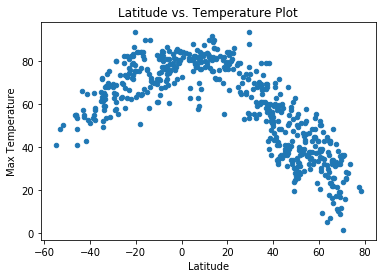

In [27]:
# Plot and label scatter plot
weather_df.plot.scatter(x='Lat', y='Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Latitude vs. Temperature Plot')

plt.savefig('Lat_vs_Temp.png')

This is a scatter plot showcasing the correlation between Latitude and Temperature data.

#### Latitude vs. Humidity Plot

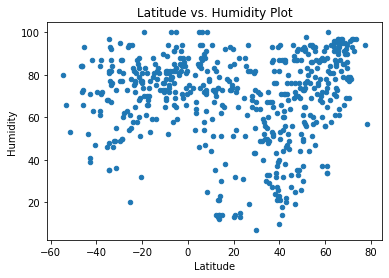

In [28]:
# Plot and label scatter plot
weather_df.plot.scatter(x='Lat', y='Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot')

plt.savefig('Lat_vs_Hum.png')

This is a scatter plot showcasing the correlation between Latitude and Humidity data.

#### Latitude vs. Cloudiness Plot

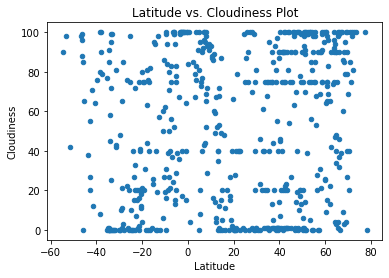

In [30]:
# Plot and label scatter plot
weather_df.plot.scatter(x='Lat', y='Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness Plot')

plt.savefig('Lat_vs_Cld.png')

This is a scatter plot showcasing the correlation between Latitude and Cloudiness data.

#### Latitude vs. Wind Speed Plot

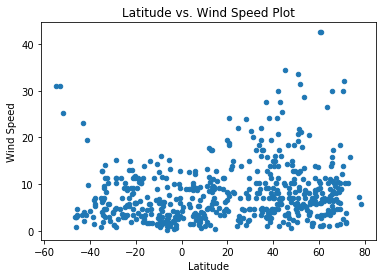

In [33]:
# Plot and label scatter plot
weather_df.plot.scatter(x='Lat', y='Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed Plot')

plt.savefig('Lat_vs_Wind.png')

This is a scatter plot showcasing the correlation between Latitude and Wind Speed data.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.87784741562772


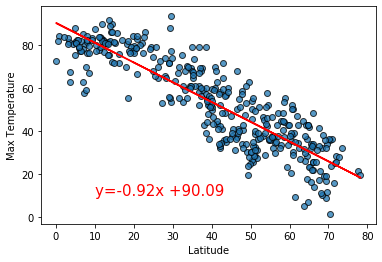

In [32]:
# Create Northern Hemisphere DataFrames
northern_hemisphere_df = weather_df.loc[weather_df['Lat'] > 0]

# Calculate the correlation coefficient and linear regression model                                            
x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot and label the model
plt.scatter(x_value, y_value, alpha=0.75, marker='o', edgecolors='black')
plt.plot(x_value, regression, "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.plot(x_value,regression,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('Regression1.png')

plt.show()

As Latitude increases; Max Temperature is decreasing
According to the r-squared value; the model is well fitted to the data.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7083867092960365


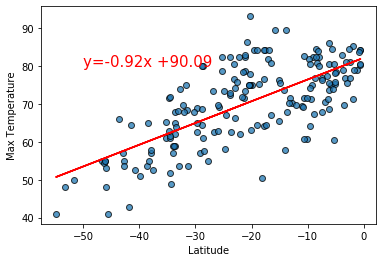

In [34]:
# Create Northern Hemisphere DataFrames
southern_hemisphere_df = weather_df.loc[weather_df['Lat'] < 0]

# Calculate the correlation coefficient and linear regression model 
x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept
line_eq2 = "y=" + str(round(slope)) + "x +" + str(round(intercept))

# Plot and label the model
plt.scatter(x_value, y_value, alpha=0.75, marker='o', edgecolors='black')
plt.plot(x_value, regression, "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.plot(x_value,regression,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('Regression2.png')

plt.show()


As Latitude increases; Max Temperature is increasing
According to the r-squared value; the model is well fitted to the data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2472006969116153


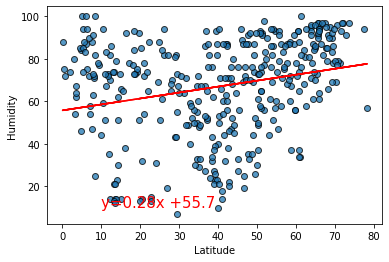

In [35]:
# Calculate the correlation coefficient and linear regression model 
x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot and label the model
plt.scatter(x_value, y_value, alpha=0.75, marker='o', edgecolors='black')
plt.plot(x_value, regression, "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_value,regression,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('Regression3.png')

plt.show()

As Latitude increases; Humidity is increasing
According to the r-squared value; the model is not well fitted to the data.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2728325984996486


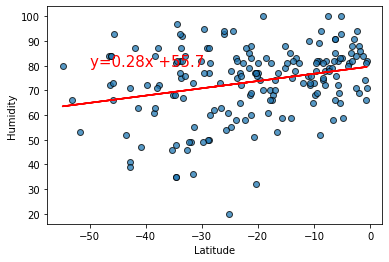

In [36]:
# Calculate the correlation coefficient and linear regression model 
x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept
line_eq2 = "y=" + str(round(slope)) + "x +" + str(round(intercept))

# Plot and label the model
plt.scatter(x_value, y_value, alpha=0.75, marker='o', edgecolors='black')
plt.plot(x_value, regression, "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(x_value,regression,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('Regression4.png')

plt.show()

As Latitude increases; Humidity is decreasing
According to the r-squared value; the model is not well fitted to the data.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13754155947981686


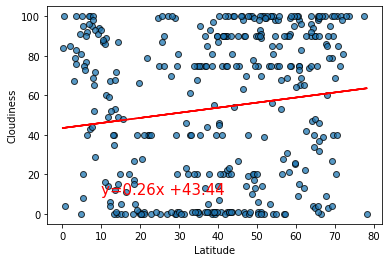

In [37]:
# Calculate the correlation coefficient and linear regression model 
x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot and label the model
plt.scatter(x_value, y_value, alpha=0.75, marker='o', edgecolors='black')
plt.plot(x_value, regression, "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_value,regression,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('Regression5.png')

plt.show()

As Latitude increases; Cloudiness is increasing
According to the r-squared value; the model is not well fitted to the data.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12551133359997346


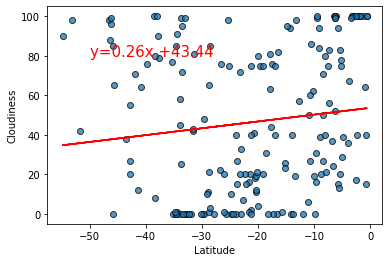

In [38]:
# Calculate the correlation coefficient and linear regression model 
x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept
line_eq2 = "y=" + str(round(slope)) + "x +" + str(round(intercept))

# Plot and label the model
plt.scatter(x_value, y_value, alpha=0.75, marker='o', edgecolors='black')
plt.plot(x_value, regression, "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.plot(x_value,regression,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('Regression6.png')

plt.show()

As Latitude increases; Cloudiness is increasing
According to the r-squared value; the model is not well fitted to the data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11737842610568737


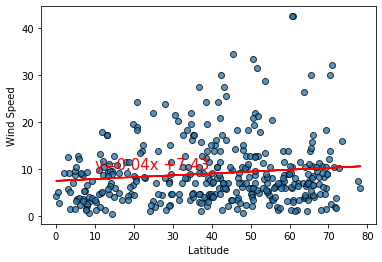

In [39]:
# Calculate the correlation coefficient and linear regression model 
x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot and label the model
plt.scatter(x_value, y_value, alpha=0.75, marker='o', edgecolors='black')
plt.plot(x_value, regression, "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_value,regression,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")

plt.savefig('Regression7.png')

plt.show()

As Latitude increases; Wind Speed is increasing
According to the r-squared value; the model is not well fitted to the data.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24917932766210343


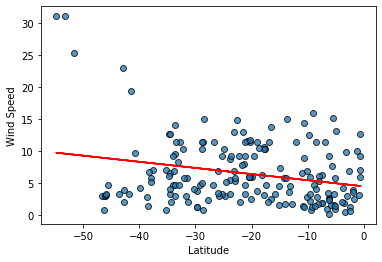

In [40]:
# Calculate the correlation coefficient and linear regression model 
x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regression = x_value * slope + intercept
line_eq = "y=" + str(round(slope)) + "x +" + str(round(intercept))

# Plot and label the model
plt.scatter(x_value, y_value, alpha=0.75, marker='o', edgecolors='black')
plt.plot(x_value, regression, "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.plot(x_value,regression,"r-")
print(f"The r-squared is: {rvalue}")

plt.savefig('Regression8.png')

plt.show()

As Latitude increases; Wind Speed is decreasing
According to the r-squared value; the model is not well fitted to the data.